# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./M_1/titanic_train.csv')
test = pd.read_csv('./M_1/titanic_test.csv')

In [3]:
train_df = train.copy(deep=True)
data_cleaner = [train_df, test]

# Information of Data


- PassengerID와 Ticket은 각각에 부여된 고유 식별자로, 결과(사망 여부)에 영향이 없다. 따라서, Drop한다.
<br><br>

- Pclass는 티켓 등급을 나타낸 데이터로, SES(Socio-Economic Status) 즉 사회/경제적 지위를 나타내는 대용물이 될 수 있다.

        1=상위 계급, 2=중간 계급, 3=하위 계급

- Name은 feature engineering에 사용될 수 있다. 
        title(지위, 작위 등)로부터 성별을 추출해 낼 수 있고, surname(성)을 통해 가족 규모를 추정할 수 있고, 
        doctor/master과 같은 title로부터 SES를 구해낼 수 있기 때문이다.
        그러한 변수들이 이미 존재하기 때문에, master와 같은 title이 어떤 차이를 만들어 내는지 확인해 볼 필요가 있음.

- SibSp는 탑승한 친척/배우자의 수를 의미하고 Parch는 탑승한 가족과 아이의 수를 의미한다.
    두 변수를 통해 가족 인원 수나 혼자인지 여부를 추출해 내기 위한 feature engineering을 위해 사용될 수 있다.
<br><br>
- Cabin은 배 위에서의 대략적인 등급, SES를 추출하기 위한 특징값 추출에 사용될 수 있다. 
      

In [4]:
pd.set_option('max_colwidth',100)

In [5]:
print("-"*40)
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*40)
print('Test/validation columns with null values:\n', test.isnull().sum())
print("-"*40)

train_df.describe(include = 'all')

----------------------------------------
Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test/validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hirvonen, Miss. Hildur E",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Find the Base-Truth 

base_truth = train_df['Survived'].mean()
other_truth = 1-base_truth
print (base_truth, other_truth)

ground_truth = max(base_truth, other_truth)  #기준값
print(ground_truth)

0.3838383838383838 0.6161616161616161
0.6161616161616161


In [7]:
Corr_mat = train_df.corr()
Corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
Corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

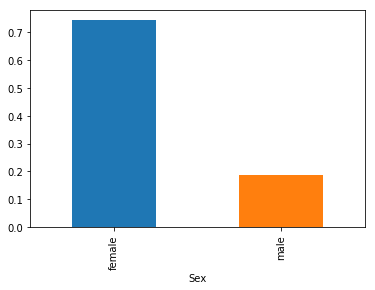

In [9]:
## Sex only

Class_Sex = train_df.groupby('Sex').mean()
Class_Sex
Class_Sex['Survived'].plot.bar()

In [10]:
#groupby함수
def gb_train(x):
    x = train_df.groupby(x).mean()
    return x


 - Pclass & Sex

Pclass: 티켓 등급에 대한 서수적 데이터 형식으로, SES(Socio-Economic Status) 즉, 사회/경제적 지위를 나타내는 대용물이 될 수 있다.

1=상위 계급, 2=중간 계급, 3=하위 계급
                                  

In [11]:
gb_train(['Pclass','Sex'])

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

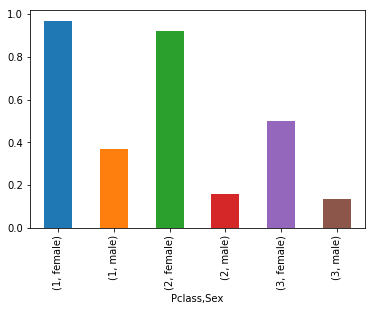

In [12]:
gb_train(['Pclass','Sex'])['Survived'].plot.bar()

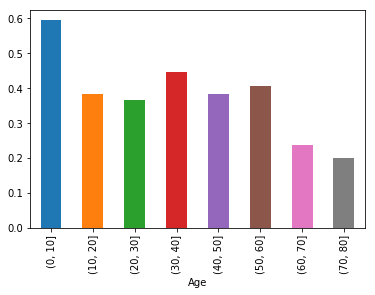

In [13]:
## Age
Group_by_age = pd.cut(train_df["Age"], np.arange(0,90,10))
Class_age = gb_train([Group_by_age])
Class_age['Survived'].plot.bar()

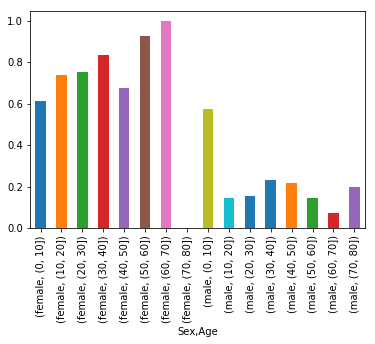

In [14]:
gb_train(['Sex',Group_by_age])['Survived'].plot.bar()

In [15]:
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# Feature Engineering

In [16]:
# Cabin Preprocessing -> Cabin_bool = Null = 0  ,  Other = 1
train_df.loc[train_df["Cabin"].str.contains('.', regex=True, na=False), "Cabin_Bin"] = 1
train_df["Cabin_Bin"].fillna(0, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [17]:
train_df = train_df.drop(["Cabin"],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [18]:
train_df = train_df.dropna()

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
Cabin_Bin      712 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 72.3+ KB


In [20]:
#Parch는 탑승한 가족과 아이의 수
## Parch > 0 and Age < 10

train_df.loc[(train_df["Parch"]>0) & (train_df["Age"]<10),"Child_with_Parent"] = 1
train_df["Child_with_Parent"].fillna(0, inplace=True)
train_df.head()

#train_df["Survived"].loc[train_df["Child_with_Parent"] == 1].sum() / len(train_df["Survived"].loc[train_df["Child_with_Parent"] == 1])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,0.0


# Preprocessing

In [21]:
from sklearn import preprocessing
processed_df = train_df.copy()
le = preprocessing.LabelEncoder()

processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.Embarked = le.fit_transform(processed_df.Embarked)
processed_df.Cabin_Bin = le.fit_transform(processed_df.Cabin_Bin)
processed_df.Child_with_Parent = le.fit_transform(processed_df.Child_with_Parent)

processed_df = processed_df.drop(['Name','Ticket','PassengerId'],axis=1)

In [22]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Survived             712 non-null int64
Pclass               712 non-null int64
Sex                  712 non-null int32
Age                  712 non-null float64
SibSp                712 non-null int64
Parch                712 non-null int64
Fare                 712 non-null float64
Embarked             712 non-null int32
Cabin_Bin            712 non-null int64
Child_with_Parent    712 non-null int64
dtypes: float64(2), int32(2), int64(6)
memory usage: 55.6 KB


In [23]:
from sklearn.model_selection import train_test_split
train_d, test_d = train_test_split(processed_df,test_size=0.2)
train_d = train_d.reset_index().drop('index',axis=1) 
test_d = test_d.reset_index().drop('index',axis=1) 
print(len(train_d))
print(len(test_d))

569
143


In [24]:
latent_y = test_d[['Survived']]
test_d = test_d.drop(['Survived'],axis=1)
display(train_d.head())
display(test_d.head())
# In reality, you can get only data of 'training set' and 'testing set without dependent variables'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,1,2,0,28.0,0,0,13.0000,2,0,0
1,1,3,0,27.0,0,1,12.4750,2,1,0
2,0,3,0,45.0,0,1,14.4542,0,0,0
3,1,2,0,24.0,2,3,18.7500,2,0,0
4,0,3,0,2.0,0,1,10.4625,2,1,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,3,1,26.0,0,0,18.7875,0,0,0
1,3,1,16.0,0,0,9.5000,2,0,0
2,3,0,40.0,1,0,9.4750,2,0,0
3,2,1,35.0,0,0,10.5000,2,0,0
4,1,0,16.0,0,1,57.9792,0,1,0


In [25]:
latent_y.head()

,Survived
0,1
1,0
2,0
3,0
4,1


In [26]:
from sklearn.model_selection import train_test_split
X = train_d.drop(['Survived'],axis=1)
y = train_d[['Survived']]
display(X.head())
display(y.head())
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
# X_train, X_val, y_train, y_val are from the only training set, not testing set

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,2,0,28.0,0,0,13.0000,2,0,0
1,3,0,27.0,0,1,12.4750,2,1,0
2,3,0,45.0,0,1,14.4542,0,0,0
3,2,0,24.0,2,3,18.7500,2,0,0
4,3,0,2.0,0,1,10.4625,2,1,1


,Survived
0,1
1,1
2,0
3,1
4,0


# Model

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ["l1","l2"], 'C':[0.5,1.0,2.0,999.]} 
    # Inverse of regularization Strength -> 1/C
    ]

logit_reg = LogisticRegression()
lr_grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                          scoring="accuracy")

lr_grid_search.fit(X_train,y_train)

cvres = lr_grid_search.cv_results_



C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:43

C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:43

In [29]:
cvres

C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py

{'mean_fit_time': array([0.00578566, 0.00320106, 0.00471997, 0.00319486, 0.00520134,
        0.00386467, 0.00577559, 0.00358615]),
 'std_fit_time': array([0.00132402, 0.00039265, 0.00156272, 0.00039769, 0.00114442,
        0.00066538, 0.00116611, 0.00080635]),
 'mean_score_time': array([0.00140314, 0.00097818, 0.0009829 , 0.00080404, 0.00099773,
        0.00100279, 0.00080428, 0.00119457]),
 'std_score_time': array([4.82021200e-04, 1.98923981e-05, 6.35534543e-04, 4.02215933e-04,
        9.58430826e-07, 6.42915970e-04, 4.02332538e-04, 3.99677658e-04]),
 'param_C': masked_array(data=[0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 999.0, 999.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.5,

In [30]:
for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (lr_grid_search.best_params_)
print (lr_grid_search.best_score_)

0.7736263736263737 {'C': 0.5, 'penalty': 'l1'}
0.7670329670329671 {'C': 0.5, 'penalty': 'l2'}
0.7824175824175824 {'C': 1.0, 'penalty': 'l1'}
0.7736263736263737 {'C': 1.0, 'penalty': 'l2'}
0.7824175824175824 {'C': 2.0, 'penalty': 'l1'}
0.7824175824175824 {'C': 2.0, 'penalty': 'l2'}
0.789010989010989 {'C': 999.0, 'penalty': 'l1'}
0.7912087912087912 {'C': 999.0, 'penalty': 'l2'}
{'C': 999.0, 'penalty': 'l2'}
0.7912087912087912


In [31]:
pd.DataFrame(lr_grid_search.cv_results_)

C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005786,0.001324,0.001403,4.820212e-04,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.760870,0.791209,0.747253,...,0.773626,0.030222,6,0.807163,0.802198,0.793956,0.785714,0.802740,0.798354,0.007625
1,0.003201,0.000393,0.000978,1.989240e-05,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.750000,0.791209,0.747253,...,0.767033,0.030075,8,0.812672,0.788462,0.796703,0.793956,0.805479,0.799455,0.008598
2,0.004720,0.001563,0.000983,6.355345e-04,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.750000,0.780220,0.791209,...,0.782418,0.025035,3,0.823691,0.791209,0.791209,0.807692,0.819178,0.806596,0.013604
3,0.003195,0.000398,0.000804,4.022159e-04,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.750000,0.769231,0.769231,...,0.773626,0.026386,6,0.820937,0.791209,0.793956,0.799451,0.802740,0.801658,0.010452
4,0.005201,0.001144,0.000998,9.584308e-07,2,l1,"{'C': 2.0, 'penalty': 'l1'}",0.760870,0.769231,0.791209,...,0.782418,0.023280,3,0.823691,0.793956,0.802198,0.804945,0.827397,0.810438,0.012907
5,0.003865,0.000665,0.001003,6.429160e-04,2,l2,"{'C': 2.0, 'penalty': 'l2'}",0.760870,0.769231,0.791209,...,0.782418,0.023280,3,0.823691,0.799451,0.791209,0.807692,0.816438,0.807696,0.011594
6,0.005776,0.001166,0.000804,4.023325e-04,999,l1,"{'C': 999.0, 'penalty': 'l1'}",0.760870,0.780220,0.791209,...,0.789011,0.030469,2,0.823691,0.796703,0.802198,0.804945,0.824658,0.810439,0.011529
7,0.003586,0.000806,0.001195,3.996777e-04,999,l2,"{'C': 999.0, 'penalty': 'l2'}",0.771739,0.780220,0.791209,...,0.791209,0.028701,1,0.823691,0.796703,0.802198,0.804945,0.824658,0.810439,0.011529


In [32]:
y_val.Survived.value_counts()

0    61
1    53
Name: Survived, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred_lr = lr_grid_search.predict(X_val)
pred_proba_lr = lr_grid_search.predict_proba(X_val)[:,1]
print(accuracy_score(y_val, pred_lr))
print(roc_auc_score(y_val, pred_proba_lr))
print(classification_report(y_val, pred_lr))
print(confusion_matrix(y_val, pred_lr))

0.7543859649122807
0.8304979894834519
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        61
           1       0.77      0.68      0.72        53

   micro avg       0.75      0.75      0.75       114
   macro avg       0.76      0.75      0.75       114
weighted avg       0.76      0.75      0.75       114

[[50 11]
 [17 36]]


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("tf_clf", clf_dt),
])

param_grid = [
        {'tf_clf__criterion': ['gini'], 'tf_clf__max_depth' : [2,3,4,5]},
        {'tf_clf__criterion': ['entropy'], 'tf_clf__max_depth' : [2,3,4,5]},
    ]

dt_grid_search = GridSearchCV(dt_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

dt_grid_search.fit(X_train,y_train)

cvres = dt_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (dt_grid_search.best_params_)
print (dt_grid_search.best_score_)

C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float6

C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int

0.7494505494505495 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 2}
0.7670329670329671 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 3}
0.8065934065934066 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.7934065934065934 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 5}
0.7516483516483516 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 2}
0.7736263736263737 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.7868131868131868 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.7978021978021979 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 5}
{'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.8065934065934066


C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int

In [36]:
pred_dt = dt_grid_search.predict(X_val)
pred_proba_dt = dt_grid_search.predict_proba(X_val)[:,1]
print(accuracy_score(y_val, pred_dt))
print(roc_auc_score(y_val, pred_proba_dt))
print(classification_report(y_val, pred_dt))
print(confusion_matrix(y_val, pred_dt))

0.7192982456140351
0.7998762759047324
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        61
           1       0.77      0.57      0.65        53

   micro avg       0.72      0.72      0.72       114
   macro avg       0.73      0.71      0.71       114
weighted avg       0.73      0.72      0.71       114

[[52  9]
 [23 30]]


C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("rf_clf", clf_rf),
])

param_grid = [
        {'rf_clf__n_estimators': [10,50,100,500], 
         'rf_clf__criterion': ["gini","entropy"], 
         'rf_clf__min_samples_split': [2,3,4,5]}
    ]

rf_grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

rf_grid_search.fit(X_train,y_train)

cvres = rf_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (rf_grid_search.best_params_)
print (rf_grid_search.best_score_)

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.7802197802197802 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 10}
0.7824175824175824 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 50}
0.7846153846153846 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
0.7846153846153846 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 500}
0.7824175824175824 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 10}
0.7956043956043956 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 50}
0.789010989010989 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 100}
0.8 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 500}
0.8021978021978022 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 4, 'rf_clf__n_estimators': 10}
0.7868131868131868 {'rf_clf__cr

C:\Users\p\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [39]:
pred_rf = rf_grid_search.predict(X_val)
pred_proba_rf = rf_grid_search.predict_proba(X_val)[:,1]
print(accuracy_score(y_val, pred_rf))
print(roc_auc_score(y_val, pred_proba_rf))
print(classification_report(y_val, pred_rf))
print(confusion_matrix(y_val, pred_rf))

0.7543859649122807
0.809155583049799
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        61
           1       0.77      0.68      0.72        53

   micro avg       0.75      0.75      0.75       114
   macro avg       0.76      0.75      0.75       114
weighted avg       0.76      0.75      0.75       114

[[50 11]
 [17 36]]
